# 9. Houghova transformácia

In [1]:
import numpy as np
from skimage import filters, color, io, feature
from skimage.transform import hough_line, hough_line_peaks
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


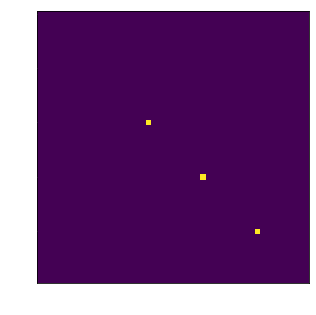

In [3]:
I = np.zeros((50,50))
I[20,20]=1
I[30,30]=1
I[40,40]=1
#I[4,14]=1

plt.figure(figsize=(5,5))
plt.imshow(I)

## rho = x * cos(theta) + y * sin(theta)

In [4]:
thetas = np.arange(0, np.pi, 0.02)
display("Theta has: "+ str(thetas.size)+" values.")

'Theta has: 158 values.'

Text(0, 0.5, 'Rhos - posunutie ak chcem trafit hranu')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


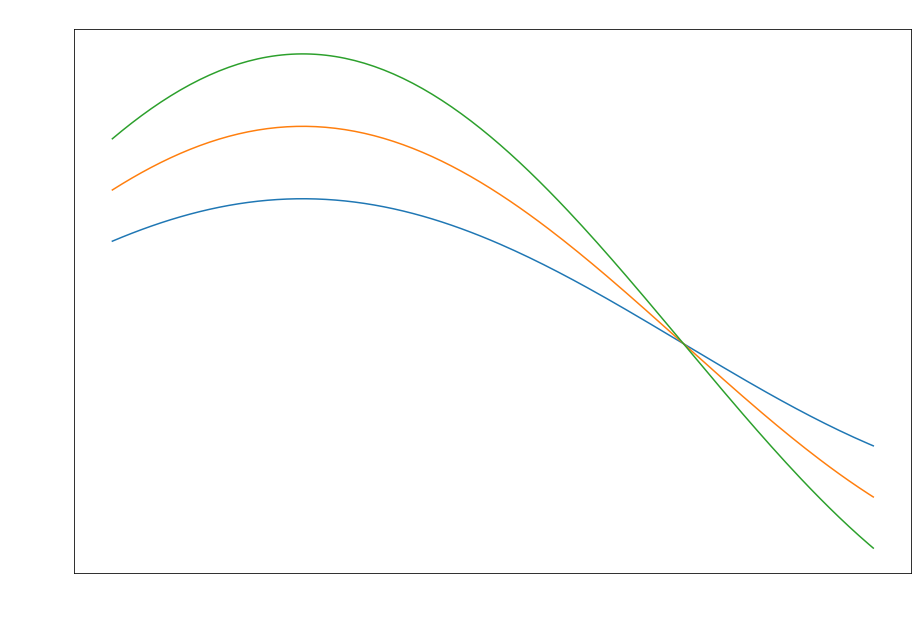

In [5]:
x,y = np.where(I==1)

plt.figure(figsize=(15,10))
rho_stack = []

for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    rho_stack.append(rhos)
    plt.plot(np.rad2deg(thetas), rhos)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - uhol v stupnoch")
plt.ylabel("Rhos - posunutie ak chcem trafit hranu")

In [6]:
rho_stack = np.array(rho_stack)

r1 = np.abs(rho_stack[0,:]-rho_stack[1,:])
r2 = np.abs(rho_stack[0,:]-rho_stack[2,:])
r3 = np.abs(rho_stack[1,:]-rho_stack[2,:])

min_dif = np.where((r1+r2+r3) == np.min(r1+r2+r3) )

rho_winner = rho_stack[0, min_dif]
theta_winner = thetas[min_dif]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format(rho_winner,np.rad2deg(theta_winner)))


'We found fitting  line with params Rho: [[-0.10763581]] pixels and Theta [135.21803965] degrees'

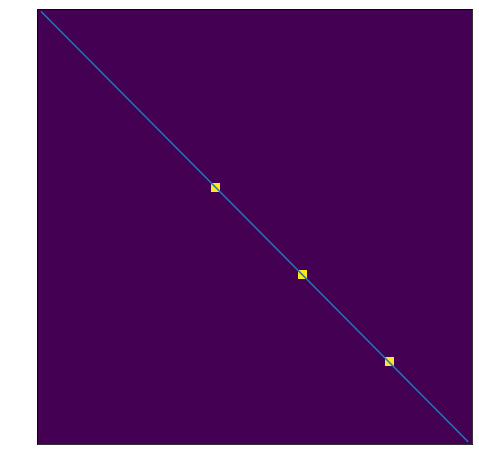

In [7]:
line_x = np.array([[0, I.shape[1]-1]])
line_y = (-np.cos(theta_winner)/np.sin(theta_winner))*line_x + rho_winner/np.sin(theta_winner)
plt.figure(figsize=(8,8))
plt.imshow(I)
plt.plot(line_x.ravel(),line_y.ravel())

In [8]:
accumulator = []
for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    accumulator.append(rhos)
accumulator = np.array(rho_stack)

D = np.sqrt(I.shape[0]**2+ I.shape[1]**2) #uhlopriecka
rho_range =np.arange(-I.shape[1],D,1)   # ake realne hodnoty moze naberat priamka v obraze?

In [9]:
hough_space = np.zeros((rho_range.size, thetas.size))

### Akumulacia do disktretizovanej matice (obrazka *)

Text(0, 0.5, 'Rhos - premapovane do disk. priestoru 121')

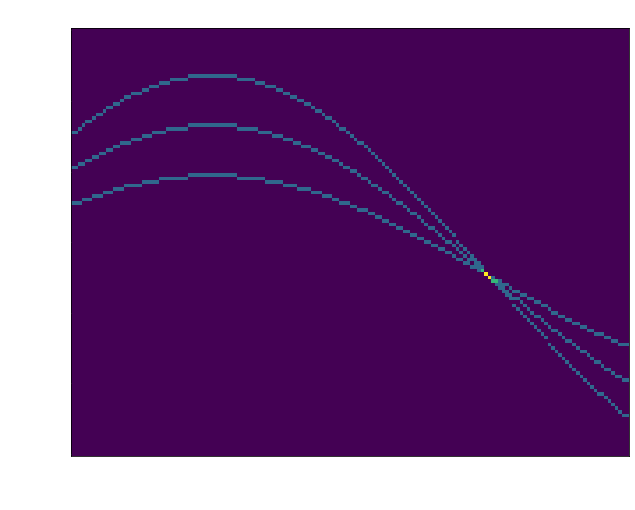

In [10]:
for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rho_range)

    hough_space[:hough_space.shape[0]-1, i] = np.flipud(y_hist)
plt.figure(figsize=(10,10))
plt.imshow(hough_space)

plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - premapovane do disk. priestoru 158")
plt.ylabel("Rhos - premapovane do disk. priestoru 121")

In [11]:
max_hough = np.max(hough_space)
x, y = np.where(hough_space == max_hough)
theta_winner= thetas[y[1]]
rho_winner = rho_range[rho_range.size - x[1]]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format([rho_winner],np.rad2deg(theta_winner)))

'We found fitting  line with params Rho: [1.0] pixels and Theta 135.2180396508743 degrees'

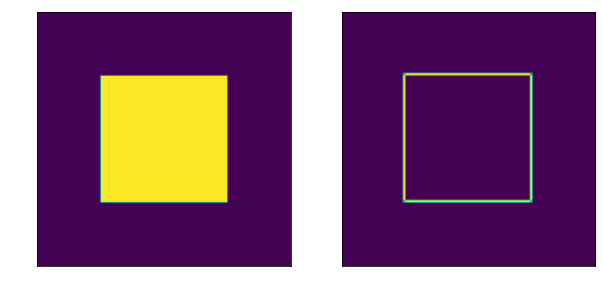

In [12]:
plt.figure(figsize=(10,10))
I = np.zeros((100, 100))
I[25:75,25:75] = 255
plt.subplot(121)
plt.imshow(I)
I = filters.roberts(I)
plt.subplot(122)
plt.imshow(I)

In [13]:
width, height = I.shape
D = (height**2 + width**2)**(1/2)

thetas = np.arange(0,np.pi,0.01)
rhos = np.arange(-width,D,1)

hough_space = np.zeros((rhos.size, thetas.size))

In [14]:
x, y = np.where(I > 0)

In [15]:
accumulator = np.zeros((x.size, thetas.size))

cos_vals = np.matmul(np.expand_dims(np.arange(0,width,1),axis=0).T,
                     np.expand_dims(np.cos(thetas),axis=0))

sin_vals = np.matmul(np.expand_dims(np.arange(0,height,1),axis=0).T,
                     np.expand_dims(np.sin(thetas),axis=0))

In [16]:
x_match = cos_vals[x,:]
y_match = sin_vals[y,:]

accumulator[:,:] =  x_match + y_match

for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rhos)
    hough_space[1:,i] = np.flipud(y_hist)

Text(0, 0.5, 'Rhos')

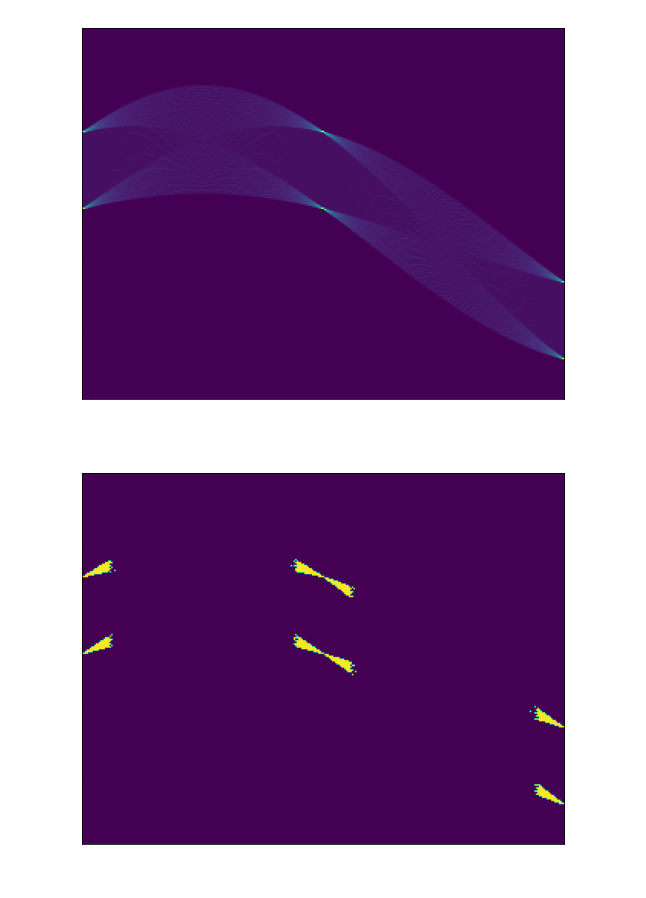

In [17]:
plt.figure(figsize=(25,15))
plt.subplot(211)
plt.imshow(hough_space)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta")
plt.ylabel("Rhos")
plt.subplot(212)
plt.imshow(hough_space> np.percentile(hough_space,99))
plt.title("Houghov priestor parametrov Rho a Theta 99th percentile")
plt.xlabel("Theta")
plt.ylabel("Rhos")

# D.U. Dokoncit cvicenie  64 - 68


In [18]:
hough_space_copy = np.copy(hough_space)

thresh = 0.7 * np.max(hough_space_copy)

supp = 5
continue_search = True
peaks = []

hough_x_size, hough_y_size = hough_space_copy.shape

while continue_search:
    value = np.max(hough_space_copy)
    
    max_array = np.where(hough_space_copy == value)
    x, y= max_array[0][0], max_array[1][0]
    
    if value > thresh:
        peaks.append([round(-1*(x - D)), ((y + 1) * 0.01) if y != 0 else 0 ])
        x_start, y_start = x - supp if x - supp > 0 else 0, y - supp if y - supp > 0 else 0
        x_end, y_end = x + supp if x + supp < hough_x_size else hough_x_size, y + supp if y + supp < hough_y_size else hough_y_size
        hough_space_copy[x_start:x_end, y_start:y_end] = np.zeros((x_end - x_start, y_end - y_start))
    else:
        continue_search = False

peaks = np.array(peaks)
print(peaks)
      

[[ 74.     0.  ]
 [ 74.     1.57]
 [ 24.     0.  ]
 [ 24.     1.57]
 [-24.     3.14]
 [-74.     3.14]]


74 1.57
24 1.57
-24 3.14
-74 3.14


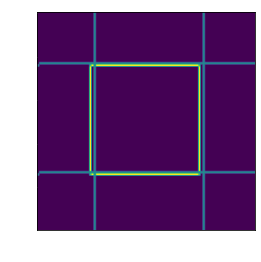

In [19]:
plt.imshow(I)
I_copy = np.copy(I)

for rho, theta in peaks[1:,:]:
    if theta == 0:
        continue
    rho = int(rho)
    print(rho, theta)
    if theta == 0 or theta >= 3.13:
        I_copy[:, rho] = 120
    else:
        line_x = np.array(range(0, I_copy.shape[1]))
        line_y = (-np.cos(theta) / np.sin(theta)) * line_x + (rho / np.sin(theta))
        for x, y in zip(line_x, line_y):
            I_copy[int(y)][x] = 120
    
    
plt.imshow(I_copy)

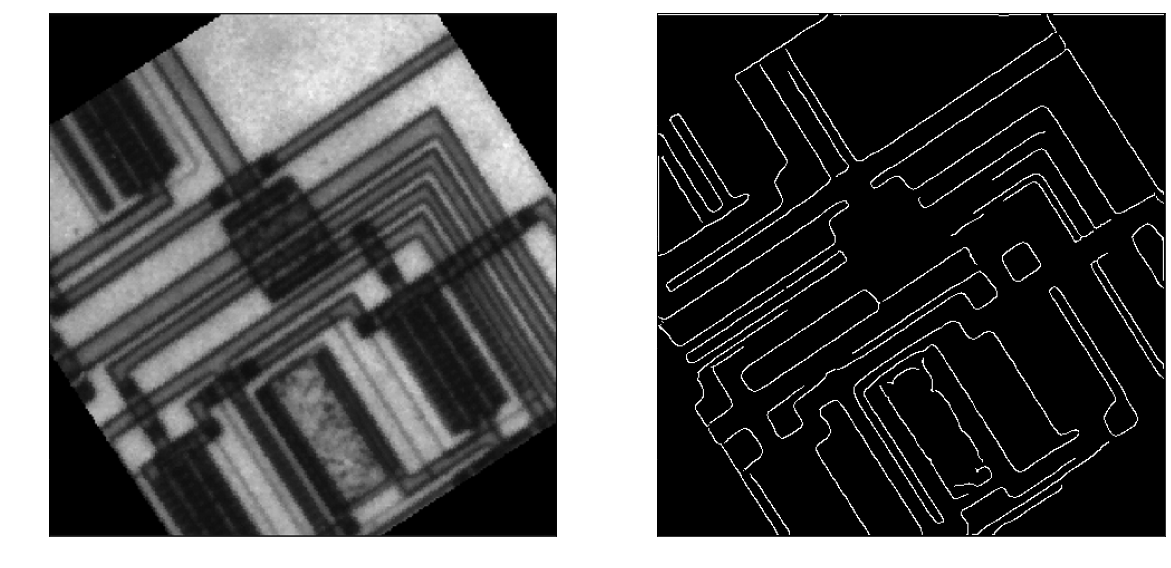

In [44]:
I = color.rgb2gray(io.imread("circuit.png"))
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(I, cmap='gray')
BW = feature.canny(I, sigma = 3)

plt.subplot(122)
plt.imshow(BW, cmap='gray')

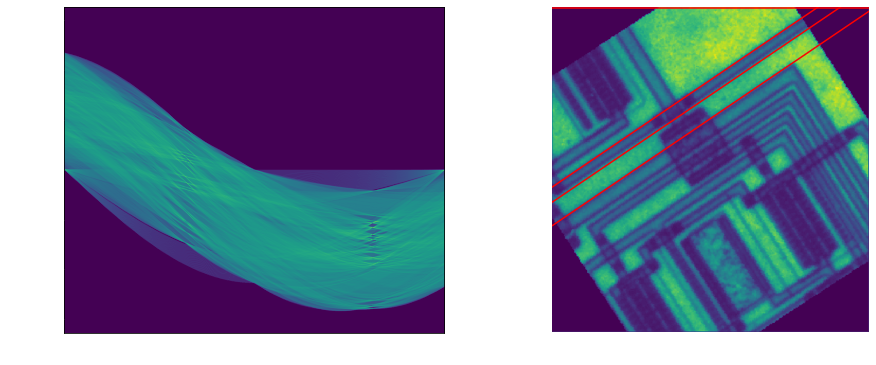

In [45]:
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(BW, theta = tested_angles)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), 
                     d[-1], d[0]], aspect='auto')
ax[1].imshow(I)
origin = np.array((0, I.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[1].plot(origin, (y0, y1), '-r')
    
ax[1].set_xlim(origin)
ax[1].set_ylim((BW.shape[0], 0))
ax[1].set_axis_off()

<ipython-input-22-f1510c5c45e9>:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt_fig.add_subplot(133).add_artist(plt.Circle((y,x),r,color=(1,0,0),fill=False))


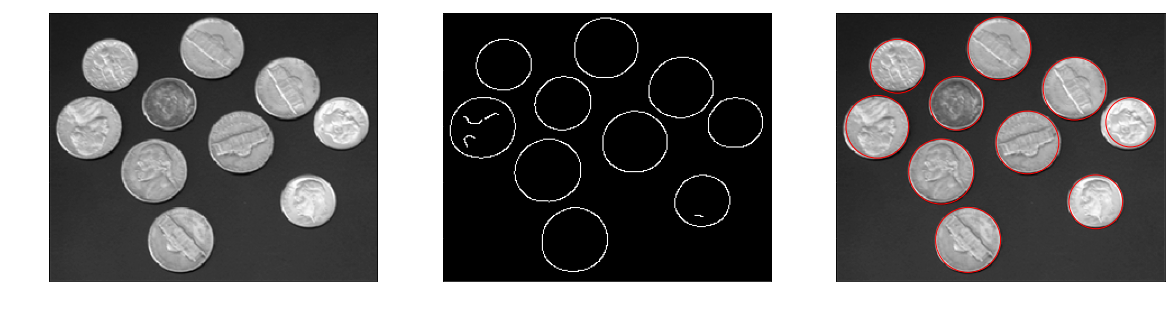

In [22]:
def hough_transform(image, radius_max, radius_min, max_circle_count, threshold = 0.5, area = 1):
    
    M,N = image.shape
    radius = radius_max - radius_min
    accumulator = np.zeros((radius_max,M+2*radius_max,N+2*radius_max))
    theta = np.arange(0, 2*np.pi, 2*np.pi / 360)
    true_pixels = np.argwhere(image[:,:])     
    
    for val in range(radius):
        r = radius_min+val
        sample_circle = np.zeros((2*(r+1),2*(r+1)))
        (m,n) = (r+1,r+1)                                                       
        for angle in theta:
            x = int(np.round(r*np.cos(angle)))
            y = int(np.round(r*np.sin(angle)))
            sample_circle[m+x,n+y] = 1
        for x,y in true_pixels:                                                      
            X = [x-m+radius_max,x+m+radius_max]                                           
            Y= [y-n+radius_max,y+n+radius_max]                                           
            accumulator[r,X[0]:X[1],Y[0]:Y[1]] += sample_circle

    circles_coors = list()
    
    for i in range(max_circle_count):
        maxim_coor = np.unravel_index(np.argmax(accumulator, axis=None), accumulator.shape)
        if accumulator[maxim_coor] > threshold * maxim_coor[0] * np.pi:
            circles_coors.append((maxim_coor[0], maxim_coor[1] - radius_max, maxim_coor[2] - radius_max ))
        accum_shape = accumulator [maxim_coor[0] - area:maxim_coor[0] + area, maxim_coor[1] - area:maxim_coor[1] + area, \
                     maxim_coor[2] - area:maxim_coor[2] + area].shape
        accumulator [maxim_coor[0] - area:maxim_coor[0] + area, maxim_coor[1] - area:maxim_coor[1] + area, \
                     maxim_coor[2] - area:maxim_coor[2] + area] = np.zeros(accum_shape)
    
    index_to_delete = list()
    for i in range(len(circles_coors) - 1):
        for a in range(i + 1, len(circles_coors)):
            try:
                r1, x1, y1 = circles_coors[i]
                r2 , x2, y2 = circles_coors[a] 
            except ValueError:
                continue
                
            if x2 in range(x1-r1, x1+r1) and y2 in range(y1-r1, y1+r1):
                if r1 > r2:
                    circles_coors[i] = ''
                else:
                    circles_coors[a] = ''
    def get_non_empty_elems(x):
        return True if x!='' else False
    circles_coors = list(filter(get_non_empty_elems, circles_coors))
    
             
    
    return circles_coors


I = color.rgb2gray(io.imread("coins.png"))

plt_fig = plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(I, cmap='gray')

BW = feature.canny(I, sigma=3)

plt.subplot(132)
plt.imshow(BW, cmap='gray')

circles_coors = hough_transform(BW, 75, 5, 10, threshold = 0.7, area=5)

plt.subplot(133)
plt.imshow(I, cmap='gray')

#print (circles_coors)
for r,x,y in circles_coors:
    #print(r)
    plt_fig.add_subplot(133).add_artist(plt.Circle((y,x),r,color=(1,0,0),fill=False))